# **30% Parcial 3**
# **Busqueda por contenido usando aprendizaje no supervisado**

#1. Realice una partición de los datos en entrenamiento (80 %) y test (20 %)



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
data =  pd.read_csv("/content/drive/My Drive/AI_2023/proyecto/data/Delitos_en_Bucaramanga_enero_2010_a_diciembre_de_2021.csv", sep=",")


# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=21)

# Verificando el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño de la partición de entrenamiento:", train_data.shape)
print("Tamaño de la partición de prueba:", test_data.shape)


Tamaño de la partición de entrenamiento: (108060, 20)
Tamaño de la partición de prueba: (27016, 20)


<ipython-input-11-6696d734c293>:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data =  pd.read_csv("/content/drive/My Drive/AI_2023/proyecto/data/Delitos_en_Bucaramanga_enero_2010_a_diciembre_de_2021.csv", sep=",")


# 2. Entrene un algoritmo de k-means (K=20) con el conjunto de entrenamiento.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Verificar la existencia de las columnas categóricas
if 'CONDUCTA' in train_data.columns and 'BARRIOS_HECHO' in train_data.columns:
    # Crear instancias de LabelEncoder
    le_conducta = LabelEncoder()
    le_barrios = LabelEncoder()

    train_data['CONDUCTA_encoded'] = le_conducta.fit_transform(train_data['CONDUCTA'])
    train_data['BARRIOS_HECHO_encoded'] = le_barrios.fit_transform(train_data['BARRIOS_HECHO'])

    # Utilizar solo las columnas codificadas para K-means
    train_data_kmeans = train_data[['CONDUCTA_encoded', 'BARRIOS_HECHO_encoded']]

    # Entrenar K-means con K=20 utilizando solo las columnas categóricas codificadas
    kmeans_with_categorical = KMeans(n_clusters=20, random_state=42)
    kmeans_with_categorical.fit(train_data_kmeans)

    # Centroides de los clusters con las columnas categóricas incluidas
    centroids = kmeans_with_categorical.cluster_centers_
    print(centroids)
else:
    print("Las columnas 'CONDUCTA' y 'BARRIOS_HECHO' no se encontraron en el conjunto de datos.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 27.05704728 312.97579012]
 [ 28.01965114 103.96202252]
 [ 28.4272037  204.08864312]
 [ 27.55835088  64.84173778]
 [ 29.09391796 450.45205092]
 [ 28.26816317   6.63166787]
 [ 28.59958791 261.81902473]
 [ 27.64142648 129.14802149]
 [ 28.68902865 391.20405311]
 [ 33.16047716 182.05806887]
 [ 34.          88.37703556]
 [ 27.50692521 237.34182825]
 [ 27.39294463  24.99142577]
 [ 26.85428928 292.75084716]
 [ 22.32285648  86.96799168]
 [ 27.99887556 145.65329835]
 [ 29.04912664 360.11390102]
 [ 28.03543386 331.78820213]
 [ 21.86550326 184.62771021]
 [ 28.17496477  48.49976515]]


# 3. Visualice la disposición de dos características, coloreando el valores de los grupos seleccionados.


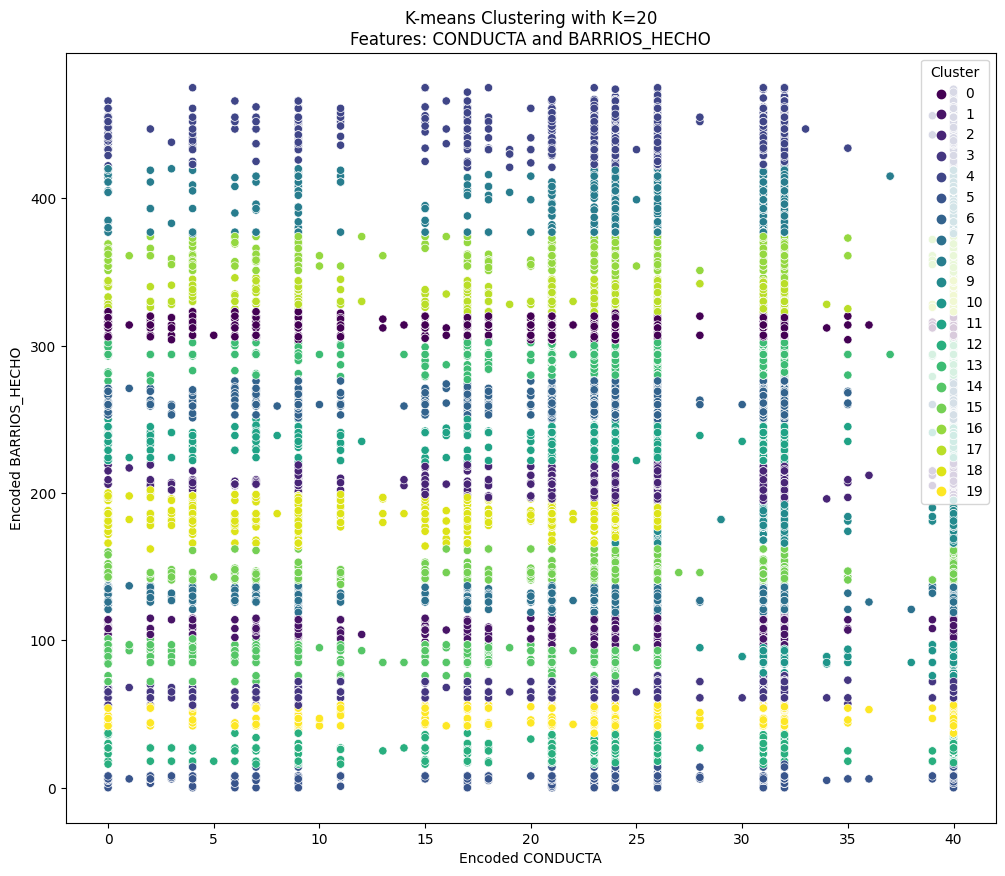

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_1 = 'CONDUCTA_encoded'
feature_2 = 'BARRIOS_HECHO_encoded'

clusters = kmeans_with_categorical.predict(train_data_kmeans)
clusters = kmeans_with_categorical.predict(train_data_kmeans)

    # Visualización
plt.figure(figsize=(12, 10))
sns.scatterplot(x=train_data_kmeans['CONDUCTA_encoded'], y=train_data_kmeans['BARRIOS_HECHO_encoded'], hue=clusters, palette='viridis', legend="full")
plt.title('K-means Clustering with K=20\nFeatures: CONDUCTA and BARRIOS_HECHO')
plt.xlabel('Encoded CONDUCTA')
plt.ylabel('Encoded BARRIOS_HECHO')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# 4. Realice una función que para cada registro en test (cada fila) retorne el cluster más cercano. Realice una prueba con dos ejemplos.


In [ ]:
def predict_cluster(row, model, le_conducta, le_barrios):
    conducta_encoded = le_conducta.transform([row['CONDUCTA']])[0]
    barrios_hecho_encoded = le_barrios.transform([row['BARRIOS_HECHO']])[0]
    return model.predict([[conducta_encoded, barrios_hecho_encoded]])[0]

# Predecir clusters para dos ejemplos del conjunto de prueba
example_1 = test_data.iloc[0]
example_2 = test_data.iloc[1]

cluster_example_1 = predict_cluster(example_1, kmeans_with_categorical, le_conducta, le_barrios)
cluster_example_2 = predict_cluster(example_2, kmeans_with_categorical, le_conducta, le_barrios)

cluster_example_1, cluster_example_2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


(10, 11)

# 5. Realice una función que para cada registro en test (cada fila) retorne tres registros (ejemplos de entrenamiento), de forma aleatoria, que también sean del cluster más cercano.


In [ ]:
def get_similar_records(row, model, train_data, le_conducta, le_barrios):
    # Predecir el cluster para el registro dado
    conducta_encoded = le_conducta.transform([row['CONDUCTA']])[0]
    barrios_hecho_encoded = le_barrios.transform([row['BARRIOS_HECHO']])[0]
    cluster = model.predict([[conducta_encoded, barrios_hecho_encoded]])[0]

    # Obtener registros del mismo cluster
    same_cluster_data = train_data[train_data_kmeans.apply(lambda x: model.predict([x])[0], axis=1) == cluster]

    # Seleccionar tres registros aleatorios del mismo cluster
    if len(same_cluster_data) > 3:
        return same_cluster_data.sample(3)
    else:
        return same_cluster_data

# Eliminar registros con valores desconocidos en 'BARRIOS_HECHO'
known_barrios = set(le_barrios.classes_)
test_data = test_data[test_data['BARRIOS_HECHO'].isin(known_barrios)]

# Aplicar LabelEncoder al conjunto de prueba corregido
test_data['BARRIOS_HECHO_encoded'] = le_barrios.transform(test_data['BARRIOS_HECHO'])

# Probar la función con un registro de prueba
example = test_data.iloc[0]
similar_records = get_similar_records(example, kmeans_with_categorical, train_data, le_conducta, le_barrios)

similar_records

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature 

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,...,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA,CONDUCTA_encoded,BARRIOS_HECHO_encoded
44483,44476,SIN EMPLEO DE ARMAS,CHORRERAS DE DON JUAN,7.091855,-73.144387,URBANA,05. García Rovira,2014,05. Mayo,27,...,VIOLENCIA INTRAFAMILIAR,Lesiones no fatales,31,05. Adultez,SOLTERO,FEMENINO,A PIE,A PIE,40,89
71810,71788,CONTUNDENTES,CENTRO,7.120196,-73.127286,URBANA,15. Centro,2016,09. Septiembre,26,...,LESIONES PERSONALES,Lesiones no fatales,35,05. Adultez,SOLTERO,FEMENINO,A PIE,A PIE,32,85
41273,41274,CONTUNDENTES,COLORADOS,7.170557,-73.135108,URBANA,01. Norte,2014,01. Enero,26,...,VIOLENCIA INTRAFAMILIAR,Lesiones no fatales,58,05. Adultez,CASADO,FEMENINO,A PIE,A PIE,40,95


# 6. Discuta los resultados.


Inicialmente apliqué k means para los valores numéricos solamente, pero no eran muy significativos para
un análisis interesante(orden, año y dia)

Decidí encontrar relaciónes entre tipo de delito y ubicación del delito para eso tomé las columnas correspondientes y apliqué todo el procesamiento en estas columnas categóricas convirtiéndolas en numéricas con label encoding.

Finalmente creo que se pudo encontrar casos similares o representativos dentro de un conjunto de datos grande. Esto podrá ser útil en aplicaciones como análisis criminal donde encontrar incidentes similares puede ayudar a entender mejor un caso específico.(de acuerdo a análisis previos coincide con los delitos más comunes y las ubicaciones más peligrosas)

# 7. haga una visualización de los datos utilizando PCA y tsne

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 108060 samples in 0.165s...
[t-SNE] Computed neighbors for 108060 samples in 11.738s...
[t-SNE] Computed conditional probabilities for sample 1000 / 108060
[t-SNE] Computed conditional probabilities for sample 2000 / 108060
[t-SNE] Computed conditional probabilities for sample 3000 / 108060
[t-SNE] Computed conditional probabilities for sample 4000 / 108060
[t-SNE] Computed conditional probabilities for sample 5000 / 108060
[t-SNE] Computed conditional probabilities for sample 6000 / 108060
[t-SNE] Computed conditional probabilities for sample 7000 / 108060
[t-SNE] Computed conditional probabilities for sample 8000 / 108060
[t-SNE] Computed conditional probabilities for sample 9000 / 108060
[t-SNE] Computed conditional probabilities for sample 10000 / 108060
[t-SNE] Computed conditional probabilities for sample 11000 / 108060
[t-SNE] Computed conditional probabilities for sample 12000 / 108060
[t-SNE] Computed conditional proba

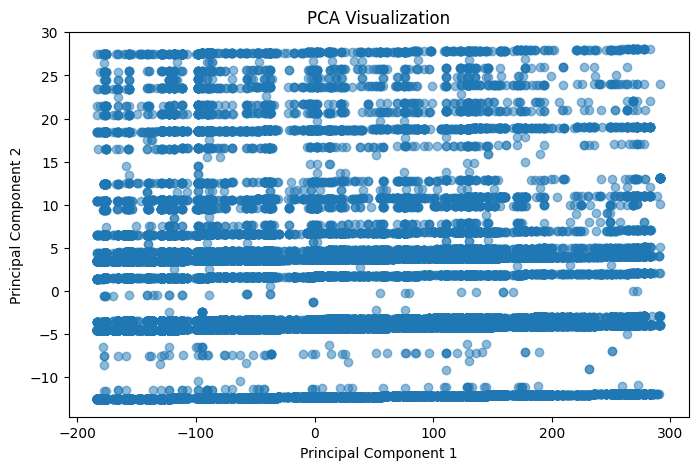

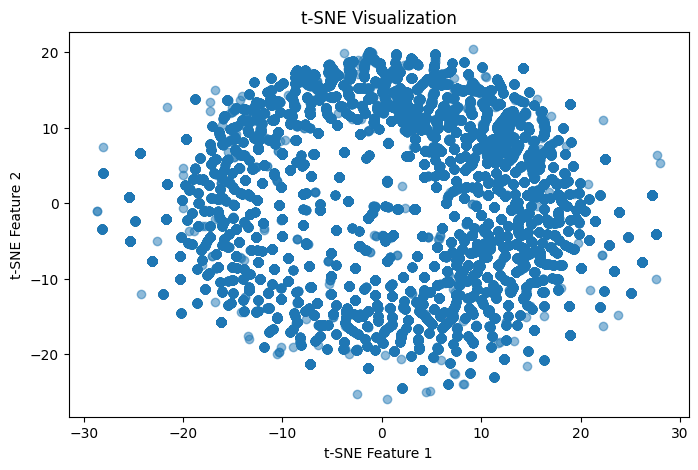

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
# Seleccionar solo las columnas codificadas para el análisis de PCA y t-SNE
data_processed = train_data[['CONDUCTA_encoded', 'BARRIOS_HECHO_encoded']]

# Eliminamos cualquier valor infinito o NaN
data_processed = data_processed.replace([np.inf, -np.inf], np.nan).dropna()

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_processed)

# Aplicar t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(data_processed)

# Visualizar los resultados de PCA
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualizar los resultados de t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

Recuerde guardar los resultados y enviar el notebook a su profesor.